# Descriptive Statistics Final Version

## Libraries

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings(action='ignore')
import os 
import re 
import itertools 
from datetime import datetime 
import datetime as dt

# Loading the data set

In [2]:
df = pd.read_csv('data_file.csv')

# Basic Coding

In [3]:
#First four rows of the data set
df.head(4)

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy1,Expected Calving,Expected Calving1,Heat Indicator,Cow ID,...,Lact No,Lactation No,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days
0,10-Dec-21,24-Dec-21,8:04:00 am,16-Mar-21,269,269.0,11.0,11.0,8,3,...,2,2,141,735,29,1.7,Normal,1,multiparous,-14
1,11-Dec-21,24-Dec-21,8:04:00 am,16-Mar-21,270,270.0,10.0,10.0,-2,3,...,2,2,131,827,32,1.5,Normal,1,multiparous,-13
2,12-Dec-21,24-Dec-21,8:04:00 am,16-Mar-21,271,271.0,9.0,9.0,8,3,...,2,2,144,660,31,2.1,Normal,1,multiparous,-12
3,13-Dec-21,24-Dec-21,8:04:00 am,16-Mar-21,272,272.0,8.0,8.0,-2,3,...,2,2,134,724,31,1.9,Normal,1,multiparous,-11


In [4]:
# Last four rows of the data set
df.tail(4)

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy1,Expected Calving,Expected Calving1,Heat Indicator,Cow ID,...,Lact No,Lactation No,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days
9314,19-Jun-22,08-Jun-22,7:20:00 am,20-Aug-21,303,NaN,NaN,NaN,5,38656,...,1,1,309,613,68,5.3,Normal,1,primiparous,11
9315,20-Jun-22,08-Jun-22,7:20:00 am,20-Aug-21,304,NaN,NaN,NaN,31,38656,...,1,1,387,559,70,6.4,Normal,1,primiparous,12
9316,21-Jun-22,08-Jun-22,7:20:00 am,20-Aug-21,305,NaN,NaN,NaN,24,38656,...,1,1,348,531,66,6.9,Normal,1,primiparous,13
9317,22-Jun-22,08-Jun-22,7:20:00 am,20-Aug-21,306,NaN,NaN,NaN,36,38656,...,1,1,428,568,57,6.4,Normal,1,primiparous,14


In [5]:
#Shape of dataset containings 9318 rows & 23 columns
df.shape

(9318, 23)

In [6]:
#Short summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                9318 non-null   object 
 1   Calving Date        9318 non-null   object 
 2   Calving Time        9318 non-null   object 
 3   Insemination Date   9318 non-null   object 
 4   Days Pregnancy      9318 non-null   int64  
 5   Days Pregnancy1     2688 non-null   float64
 6   Expected Calving    4145 non-null   float64
 7   Expected Calving1   4145 non-null   float64
 8   Heat Indicator      9318 non-null   int64  
 9   Cow ID              9318 non-null   int64  
 10  Month               9318 non-null   int64  
 11  Calving Season      9318 non-null   object 
 12  Breed               9318 non-null   object 
 13  Lact No             9318 non-null   int64  
 14  Lactation No        9318 non-null   int64  
 15  Activity            9318 non-null   int64  
 16  Rest T

In [7]:
#Short statistical information of the data set
df.describe()

,Days Pregnancy,Days Pregnancy1,Expected Calving,Expected Calving1,Heat Indicator,Cow ID,Month,Lact No,Lactation No,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Offspring,Days
count,9318.000000,2688.000000,4145.000000,4145.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000
mean,284.491307,265.245536,1.791797,9.635706,5.467590,1141.658725,6.356192,1.460936,1.442477,220.566967,602.998390,69.008693,3.693561,1.009337,0.594656
std,28.473753,13.589576,28.584619,13.674882,37.068366,2130.561346,3.747230,0.753887,0.701940,90.611223,176.892231,29.379710,3.673776,0.096180,8.324146
min,203.000000,203.000000,-220.000000,0.000000,-75.000000,3.000000,1.000000,1.000000,1.000000,50.000000,9.000000,2.000000,0.400000,1.000000,-14.000000
25%,270.000000,261.000000,-6.000000,0.000000,-17.000000,728.000000,3.000000,1.000000,1.000000,162.000000,493.000000,50.000000,2.000000,1.000000,-7.000000
50%,282.000000,269.000000,5.000000,5.000000,-2.000000,1069.000000,6.000000,1.000000,1.000000,200.000000,597.000000,65.000000,2.800000,1.000000,1.000000
75%,295.000000,274.000000,14.000000,14.000000,16.000000,1620.000000,10.000000,2.000000,2.000000,251.000000,708.000000,80.000000,4.300000,1.000000,8.000000
max,514.000000,280.000000,77.000000,280.000000,280.000000,38656.000000,12.000000,4.000000,3.000000,935.000000,1424.000000,362.000000,105.000000,2.000000,14.000000


In [8]:
#Data types of dataset
df.dtypes

Date                   object
Calving Date           object
Calving Time           object
Insemination Date      object
Days Pregnancy          int64
Days Pregnancy1       float64
Expected Calving      float64
Expected Calving1     float64
Heat Indicator          int64
Cow ID                  int64
Month                   int64
Calving Season         object
Breed                  object
Lact No                 int64
Lactation No            int64
Activity                int64
Rest Time               int64
Rest Per Bout           int64
Restlessness Ratio    float64
Manner Of Calving      object
Offspring               int64
Parity                 object
Days                    int64
dtype: object

# Cleaning Section

In [9]:
#Checking missing values of dataset
df.isnull().sum().sort_values(ascending=False) 

Days Pregnancy1       6630
Expected Calving      5173
Expected Calving1     5173
Date                     0
Lact No                  0
Parity                   0
Offspring                0
Manner Of Calving        0
Restlessness Ratio       0
Rest Per Bout            0
Rest Time                0
Activity                 0
Lactation No             0
Calving Season           0
Breed                    0
Calving Date             0
Month                    0
Cow ID                   0
Heat Indicator           0
Days Pregnancy           0
Insemination Date        0
Calving Time             0
Days                     0
dtype: int64

# Visualization of missing values or NAN values

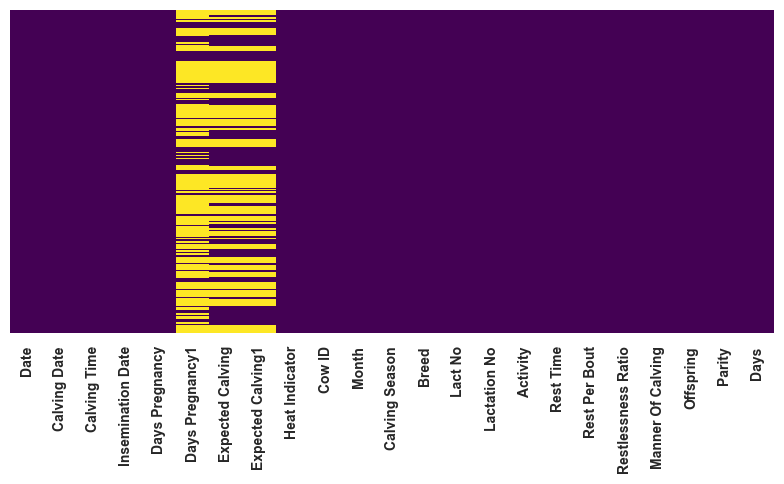

In [10]:
#Setting the background style for the chart
sns.set_style('whitegrid')
#Setting the figure size for chart
sns.set(rc={'figure.figsize':(8,5)})
#Generating heatmap for visulization of NAN values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
#Setting the x ticks for chart
plt.xticks(fontsize=10, fontweight='bold')
plt.tight_layout()
#Show the chart
plt.show()

# Conversion of datatypes in proper format

In [11]:
# Data type of variables
df.dtypes

Date                   object
Calving Date           object
Calving Time           object
Insemination Date      object
Days Pregnancy          int64
Days Pregnancy1       float64
Expected Calving      float64
Expected Calving1     float64
Heat Indicator          int64
Cow ID                  int64
Month                   int64
Calving Season         object
Breed                  object
Lact No                 int64
Lactation No            int64
Activity                int64
Rest Time               int64
Rest Per Bout           int64
Restlessness Ratio    float64
Manner Of Calving      object
Offspring               int64
Parity                 object
Days                    int64
dtype: object

In [12]:
#Converting data types into proper formate
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Calving Date'] = pd.to_datetime(df['Calving Date'])
df['Calving Date'] = df['Calving Date'].astype('datetime64[ns]')
df['Insemination Date'] = pd.to_datetime(df['Insemination Date'])
df['Insemination Date'] = df['Insemination Date'].astype('datetime64[ns]')
df['Heat Indicator'] = df['Heat Indicator'].astype('int64')
df['Cow ID'] = df['Cow ID'].astype('object')
df['Activity'] = df['Activity'].astype('int64')
df['Rest Time'] = df['Rest Time'].astype('int64')
df['Rest Per Bout'] = df['Rest Per Bout'].astype('int64')
df['Offspring'] = df['Offspring'].astype('int64')
df['Days'] = df['Days'].astype('object')
df['Days Pregnancy'] = df['Days Pregnancy'].astype('int64')
df['Month'] = df['Month'].astype('int64')
df['Parity'] = df['Parity'].astype('object')
df['Lact No'] = df['Lact No'].astype('object')
df['Lactation No'] = df['Lactation No'].astype('object')

In [13]:
# Data type of variables
df.dtypes

Date                  datetime64[ns]
Calving Date          datetime64[ns]
Calving Time                  object
Insemination Date     datetime64[ns]
Days Pregnancy                 int64
Days Pregnancy1              float64
Expected Calving             float64
Expected Calving1            float64
Heat Indicator                 int64
Cow ID                        object
Month                          int64
Calving Season                object
Breed                         object
Lact No                       object
Lactation No                  object
Activity                       int64
Rest Time                      int64
Rest Per Bout                  int64
Restlessness Ratio           float64
Manner Of Calving             object
Offspring                      int64
Parity                        object
Days                          object
dtype: object

# Extraction of numerical & categorical features

In [14]:
#Numerical features of the dataset
numerical_features = [col for col in df.columns if df[col].dtype!='O']
numerical_features

['Date',
 'Calving Date',
 'Insemination Date',
 'Days Pregnancy',
 'Days Pregnancy1',
 'Expected Calving',
 'Expected Calving1',
 'Heat Indicator',
 'Month',
 'Activity',
 'Rest Time',
 'Rest Per Bout',
 'Restlessness Ratio',
 'Offspring']

In [15]:
#Categorical features
categorical_features = [col for col in df.columns if df[col].dtypes=='O']
categorical_features

['Calving Time',
 'Cow ID',
 'Calving Season',
 'Breed',
 'Lact No',
 'Lactation No',
 'Manner Of Calving',
 'Parity',
 'Days']

# Scatter plot for numerical features

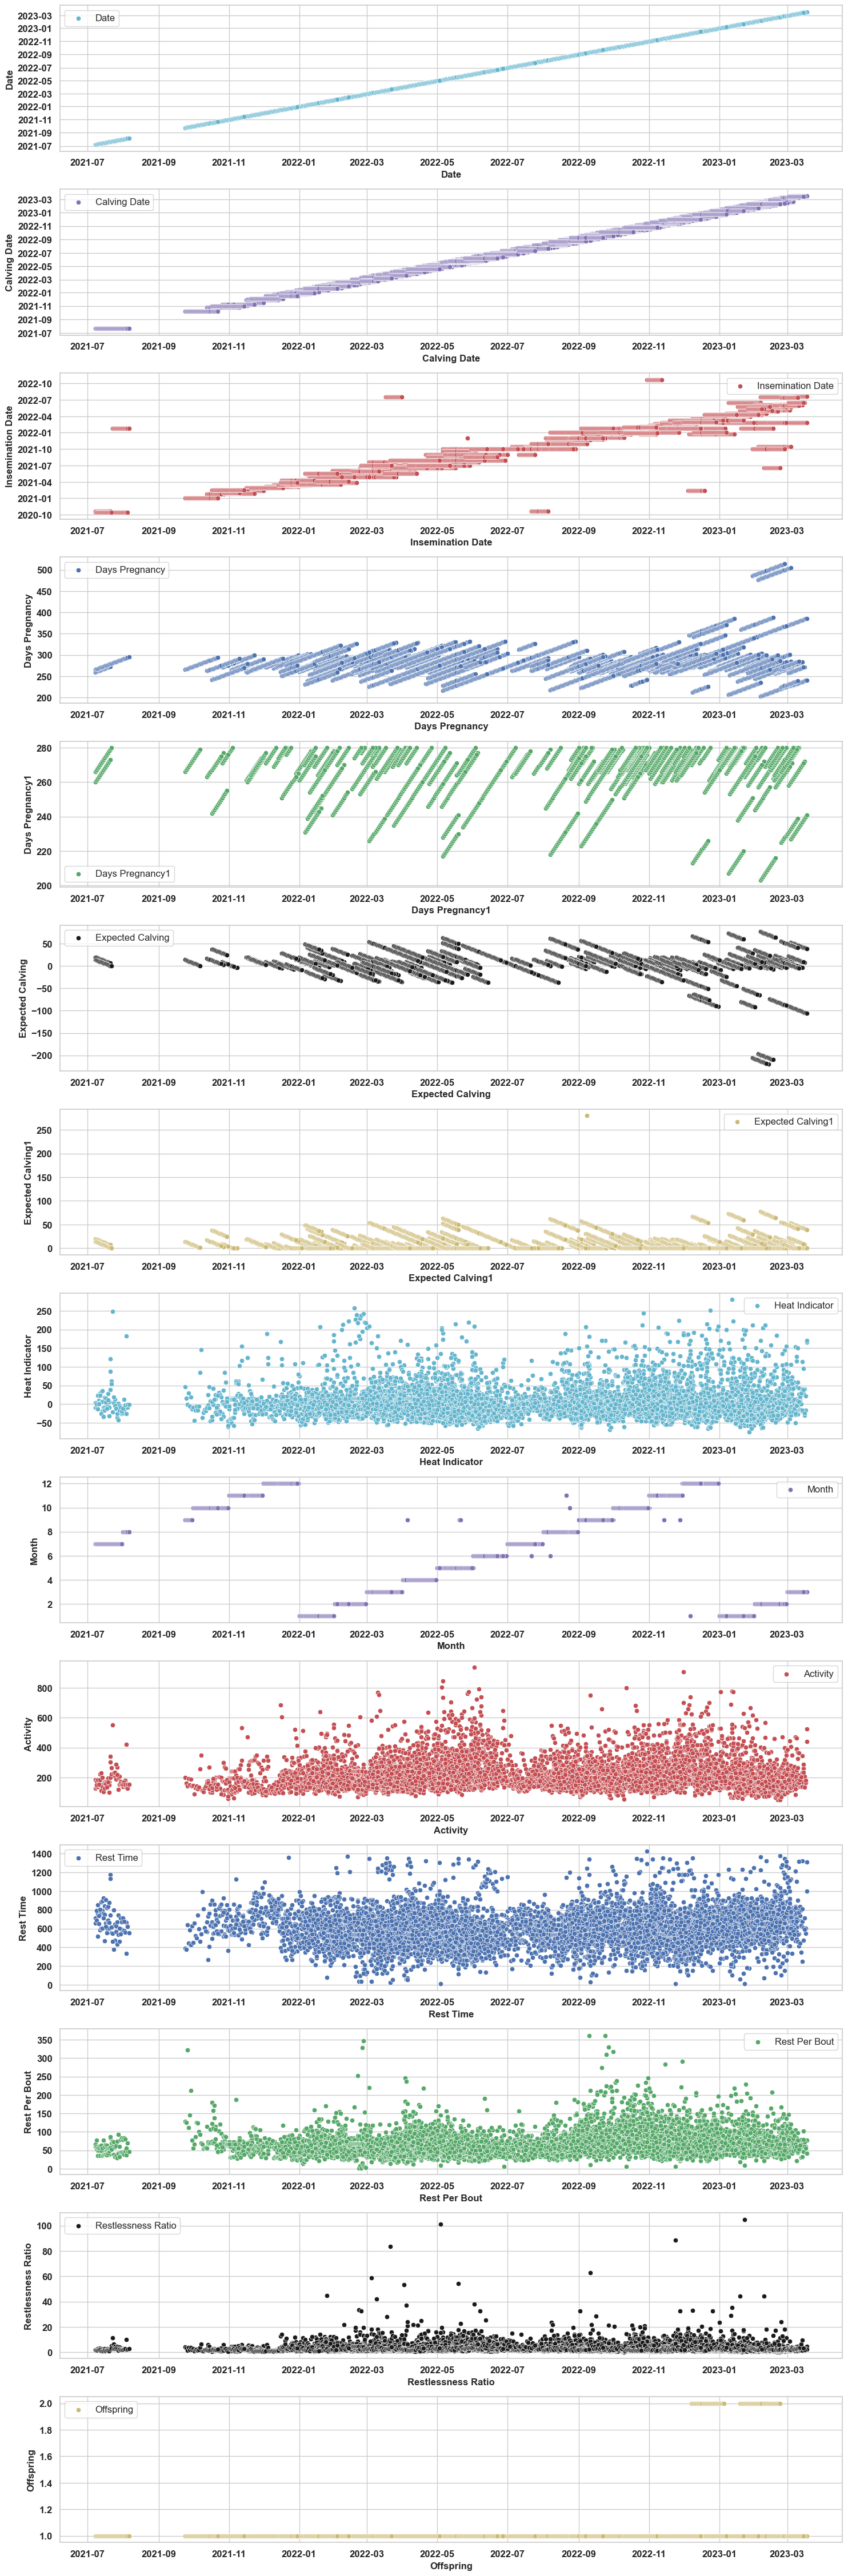

In [16]:
#Setting the backgorund style for chart
sns.set_style('whitegrid')
#Setting the color style for chart
colors = itertools.cycle(['c', 'm', 'r', 'b', 'g', 'k', 'y', 'c', 'm', 'r', 'b', 'g', 'k', 'y', 'c'])
i = 1
#Setting the figure size for chart
fig, axe = plt.subplots(3, 9, figsize=(15, 48))
#Generating the scatter plot for numerical features
for feature in numerical_features:
    plt.subplot(15, 1, i)
    sns.scatterplot(x='Date', y=df[feature], data=df, color=next(colors), label=feature)
    #Setting the label, ticks & legends
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel(feature, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.tight_layout()
    i = i + 1
#Show the chart
plt.show()

# Correlation chart for numerical variables

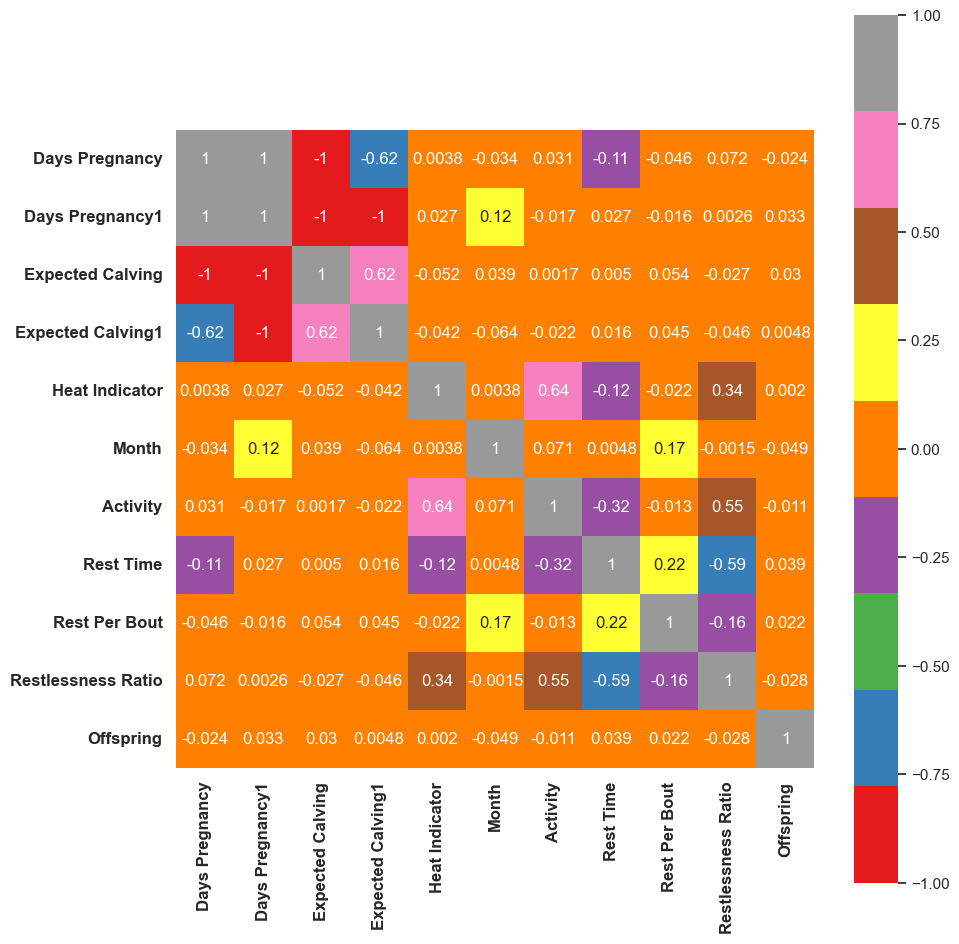

In [17]:
# Droping non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Generating the correlation chart for numerical features
corr = numeric_df.corr()
# Setting the figure size for the chart
plt.figure(figsize=(10, 10))
# Creating a heatmap
sns.heatmap(corr, cbar=True, cmap='Set1', square=True, annot=True)
# Setting the ticks for the chart
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
# Show the chart
plt.show()

# Table 1: Least Square Mean (LSM) with standard error (Excel format)

## Library

In [18]:
#Importing library
from tabulate import tabulate

## Selection of variables

In [19]:
#Filtering dataset with relevant variables
filtered_data = df[['Days', 'Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No']]

## Calculation of least square mean (LSM)

In [20]:
#Calculating the adjusted LSM for each variable, accounting for parity
lsmeans = filtered_data.groupby(['Days', 'Lactation No']).mean().reset_index()

## Calculation of stabdard error

In [21]:
#Calculating the standard error for each variable
se = filtered_data.groupby(['Days', 'Lactation No']).std() / filtered_data.groupby(['Days', 'Lactation No']).count() ** 0.5

## Creation of table

In [22]:
#Creating the table
table = []
for _, row in lsmeans.iterrows():
    table_row = [
        row['Days'],
        row['Activity'],
        row['Rest Time'],
        row['Rest Per Bout'],
        row['Restlessness Ratio'],
        row['Lactation No'],
    ]
    table.append(table_row)

## Addition of standard error

In [23]:
#Adding standard errors to the table
for i, (_, se_row) in enumerate(se.iterrows()):
    table[i].extend(se_row.tolist())

## Headers for table

In [24]:
#Headers for the table
headers = ['Days', 'Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No', 'SE Activity', 'SE Rest Time', 'SE Rest Per Bout', 'SE Restlessness Ratio']

## Printing the table

In [25]:
#Printing the table
print(tabulate(table, headers=headers, tablefmt="pipe"))

|   Days |   Activity |   Rest Time |   Rest Per Bout |   Restlessness Ratio |   Lactation No |   SE Activity |   SE Rest Time |   SE Rest Per Bout |   SE Restlessness Ratio |
|-------:|-----------:|------------:|----------------:|---------------------:|---------------:|--------------:|---------------:|-------------------:|------------------------:|
|    -14 |    231.579 |     716.383 |         73.6284 |              2.56612 |              1 |       6.45795 |       11.9675  |           1.35881  |               0.109292  |
|    -14 |    191.647 |     729.279 |         79.8676 |              2.12647 |              2 |       8.11522 |       16.1971  |           3.15428  |               0.161011  |
|    -14 |    188.889 |     738.417 |         77.8056 |              2.10278 |              3 |      13.6044  |       23.1824  |           4.70593  |               0.241834  |
|    -13 |    193.038 |     671.296 |         72.4462 |              2.5172  |              1 |       4.14544 |       10

## Saving the table

In [26]:
# Creating a DataFrame from developed table data
df_table = pd.DataFrame(table, columns=headers)
# Saving the DataFrame to Excel
df_table.to_excel('table_output_lactation_No.xlsx', index=False)

# Table 2: Least Square Mean (LSM) with standard error (Word format)¶

## Library

In [27]:
#Importing library
from docx import Document

## Selection of variable

In [28]:
#Filtering the dataset with variable of interest
filtered_data = df[['Days', 'Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No']]

## Calculation of least square mean (LSM)

In [29]:
#Calculating the adjusted LSM for each variable, accounting for parity
lsmeans = filtered_data.groupby(['Days', 'Lactation No']).mean().reset_index()

## Calculation of standard error

In [30]:
#Calculating standard error for each variable
se = filtered_data.groupby(['Days', 'Lactation No']).std() / filtered_data.groupby(['Days', 'Lactation No']).count() ** 0.5

## Creation of table

In [31]:
#Creating the table
table = []
for _, row in lsmeans.iterrows():
    se_row = se.loc[(row['Days'], row['Lactation No'])].tolist()

    table_row = [
        row['Days'],
        row['Activity'],
        row['Rest Time'],
        row['Rest Per Bout'],
        row['Restlessness Ratio'],
        row['Lactation No'],
    ]
    table_row.extend(se_row)
    table.append(table_row)

## Headers for the table

In [32]:
#Headers for the table
headers = ['Days', 'Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 
           'Lactation No', 'SE Activity', 'SE Rest Time', 'SE Rest Per Bout', 'SE Restlessness Ratio']

## Addition of data inside the table

In [33]:
#Creating a new Word document
doc = Document()
#Adding table to the document
table_docx = doc.add_table(rows=1, cols=len(headers))
table_docx.autofit = False
#Headers for the table
header_row = table_docx.rows[0]
for i, header in enumerate(headers):
    header_row.cells[i].text = header
#Putting the data rows to the table
for row in table:
    row_cells = table_docx.add_row().cells
    for i, cell_value in enumerate(row):
        row_cells[i].text = str(cell_value)

## Saving the table

In [34]:
#Saving the Word document
doc.save('table_output_lactation_no.docx')

# Table 1: Least Square Mean (LSM) with standard error with respect to Month (Excel format)

## Library

In [35]:
#Importing library
from tabulate import tabulate

## Selection of variables

In [36]:
#Filtering dataset with relevant variables
filtered_data = df[['Month', 'Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No']]

## Calculation of least square mean (LSM)

In [37]:
#Calculating the adjusted LSM for each variable, accounting for lactation no with respect to month
lsmeans = filtered_data.groupby(['Month', 'Lactation No']).mean().reset_index()

## Calculation of stabdard error

In [38]:
#Calculating the standard error for each variable
se = filtered_data.groupby(['Month', 'Lactation No']).std() / filtered_data.groupby(['Month', 'Lactation No']).count() ** 0.5

## Creation of table

In [39]:
#Creating the table
table = []
for _, row in lsmeans.iterrows():
    table_row = [
        row['Month'],
        row['Activity'],
        row['Rest Time'],
        row['Rest Per Bout'],
        row['Restlessness Ratio'],
        row['Lactation No'],
    ]
    table.append(table_row)

## Addition of standard error

In [40]:
#Adding standard errors to the table
for i, (_, se_row) in enumerate(se.iterrows()):
    table[i].extend(se_row.tolist())

## Headers for the table

In [41]:
#Headers for the table
headers = ['Month', 'Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No', 'SE Activity', 'SE Rest Time', 'SE Rest Per Bout', 'SE Restlessness Ratio']
#Printing the table

## Printing the table

In [42]:
#Printing the table
print(tabulate(table, headers=headers, tablefmt="pipe"))

|   Month |   Activity |   Rest Time |   Rest Per Bout |   Restlessness Ratio |   Lactation No |   SE Activity |   SE Rest Time |   SE Rest Per Bout |   SE Restlessness Ratio |
|--------:|-----------:|------------:|----------------:|---------------------:|---------------:|--------------:|---------------:|-------------------:|------------------------:|
|       1 |    226.151 |     595.017 |         68.5416 |              4.09691 |              1 |       3.99302 |        7.46988 |           1.14068  |               0.265518  |
|       1 |    209.275 |     679.304 |         74.9776 |              2.79936 |              2 |       5.95675 |        9.42949 |           1.74296  |               0.128126  |
|       1 |    207.813 |     676.863 |         69.9496 |              2.9223  |              3 |       7.1271  |       11.4325  |           1.65315  |               0.177469  |
|       2 |    200.625 |     580.35  |         62.9656 |              3.69369 |              1 |       3.14395 |   

## Saving the table

In [43]:
# Creating a DataFrame from developed table data
df_table = pd.DataFrame(table, columns=headers)
# Saving the DataFrame to Excel
df_table.to_excel('table_output_month.xlsx', index=False)

# Central Tendancy & Dispersion

## Activity

In [44]:
#Variable 1: Activity
mean_activity = df['Activity'].mean()
median_activity = df['Activity'].median()
variance_activity = df['Activity'].var()
std_deviation_activity = df['Activity'].std()

## Printing Result

In [45]:
#Printing the variable
print('Activity:')
print('Mean:', mean_activity)
print('Median:', median_activity)
print('Variance:', variance_activity)
print('Standard Deviation', std_deviation_activity)

Activity:
Mean: 220.56696716033483
Median: 200.0
Variance: 8210.393658097237
Standard Deviation 90.61122258361398


## Rest Time

In [46]:
#Variable 2: Rest time 
mean_rest_time = df['Rest Time'].mean()
median_rest_time = df['Rest Time'].median()
variance_rest_time = df['Rest Time'].var()
std_deviation_rest_time = df['Rest Time'].std()

## Printing Result

In [47]:
#Printing result
print('Rest Time:')
print('Mean:', mean_rest_time)
print('Median:', median_rest_time)
print('Variance:', variance_rest_time)
print('Standard Deviation', std_deviation_rest_time)

Rest Time:
Mean: 602.9983902124919
Median: 597.0
Variance: 31290.861326162198
Standard Deviation 176.89223082476573


## Rest Per Bout

In [48]:
#Variable 3: Rest per bout 
mean_rest_per_bout = df['Rest Per Bout'].mean()
median_rest_per_bout = df['Rest Per Bout'].median()
variance_rest_per_bout = df['Rest Per Bout'].var()
std_deviation_rest_per_bout = df['Rest Per Bout'].std()

## Printing Result

In [49]:
#Printing result
print('Rest Per Bout:')
print('Mean:', mean_rest_per_bout)
print('Median:', median_rest_per_bout)
print('Variance:', variance_rest_per_bout)
print('Standard Deviation', std_deviation_rest_per_bout)

Rest Per Bout:
Mean: 69.00869285254346
Median: 65.0
Variance: 863.1673602961193
Standard Deviation 29.379710010415682


## Restlessness Ratio

In [50]:
#Variable 4: Restlessness ratio
mean_restlessness_ratio = df['Restlessness Ratio'].mean()
median_restlessness_ratio = df['Restlessness Ratio'].median()
variance_restlessness_ratio = df['Restlessness Ratio'].var()
std_deviation_restlessness_ratio = df['Restlessness Ratio'].std()

## Printing Result

In [51]:
#Printing result
print('Mean:', mean_restlessness_ratio)
print('Median:', median_restlessness_ratio)
print('Variance:', variance_restlessness_ratio)
print('Standard Deviation', std_deviation_restlessness_ratio)

Mean: 3.6935608499678048
Median: 2.8
Variance: 13.49663128163551
Standard Deviation 3.6737761610685413


## Summary Statistics (Whole dataset)

In [52]:
#Creating a statistics summary table 
data = {'Variables': ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio'], 
       'Mean': [mean_activity, mean_rest_time, mean_rest_per_bout, mean_restlessness_ratio], 
       'Median': [median_activity, median_rest_time, median_rest_per_bout, median_restlessness_ratio], 
       'Variance': [variance_activity, variance_rest_time, variance_rest_per_bout, variance_restlessness_ratio],
       'Standard Deviation': [std_deviation_activity, std_deviation_rest_time, std_deviation_rest_per_bout, 
                              std_deviation_restlessness_ratio]}

#Creating a new data frame to store these variables
df_statistics = pd.DataFrame(data)

#Printing the stattistics dataframe
print(df_statistics)

            Variables        Mean  Median      Variance  Standard Deviation
0            Activity  220.566967   200.0   8210.393658           90.611223
1           Rest Time  602.998390   597.0  31290.861326          176.892231
2       Rest Per Bout   69.008693    65.0    863.167360           29.379710
3  Restlessness Ratio    3.693561     2.8     13.496631            3.673776


# Central tendancy & dispersion (Single Animal)

## Data Filteration

In [53]:
#Selection of specific animal
animal_id = 3
animal_data = df[df['Cow ID']==3]

## Activity

In [54]:
#Variable 1: Activity
mean_activity = animal_data['Activity'].mean()
median_activity = animal_data['Activity'].median()
variance_activity = animal_data['Activity'].var()
std_deviation_activity = animal_data['Activity'].std()

## Printing Result

In [56]:
#Printing the variable
print('Activity:')
print('Mean:', mean_activity)
print('Median:', median_activity)
print('Variance:', variance_activity)
print('Standard Deviation', std_deviation_activity)

Activity:
Mean: 164.46428571428572
Median: 160.0
Variance: 1727.7394179894181
Standard Deviation 41.566084949023264


## Rest Time

In [57]:
#Variable 2: Rest Time
mean_activity = animal_data['Rest Time'].mean()
median_activity = animal_data['Rest Time'].median()
variance_activity = animal_data['Rest Time'].var()
std_deviation_activity = animal_data['Rest Time'].std()

## Printing Result

In [58]:
#printing result
print('Rest Time:')
print('Mean:', mean_rest_time)
print('Median:', median_rest_time)
print('Variance:', variance_rest_time)
print('Standard Deviation', std_deviation_rest_time)

Rest Time:
Mean: 602.9983902124919
Median: 597.0
Variance: 31290.861326162198
Standard Deviation 176.89223082476573


## Rest Per Bout

In [59]:
#Variable 3: Rest per bout 
mean_rest_per_bout = animal_data['Rest Per Bout'].mean()
median_rest_per_bout = animal_data['Rest Per Bout'].median()
variance_rest_per_bout = animal_data['Rest Per Bout'].var()
std_deviation_rest_per_bout = animal_data['Rest Per Bout'].std()

## Printing Result

In [60]:
#Printing result
print('Rest Per Bout:')
print('Mean:', mean_rest_per_bout)
print('Median:', median_rest_per_bout)
print('Variance:', variance_rest_per_bout)
print('Standard Deviation', std_deviation_rest_per_bout)

Rest Per Bout:
Mean: 31.107142857142858
Median: 30.0
Variance: 108.39550264550263
Standard Deviation 10.411316086139285


## Retlessness Ratio

In [61]:
#Variable 4: Restlessness ratio
mean_restlessness_ratio = animal_data['Restlessness Ratio'].mean()
median_restlessness_ratio = animal_data['Restlessness Ratio'].median()
variance_restlessness_ratio = animal_data['Restlessness Ratio'].var()
std_deviation_restlessness_ratio = animal_data['Restlessness Ratio'].std()

## Printing Result

In [62]:
#Printing result
print('Mean:', mean_restlessness_ratio)
print('Median:', median_restlessness_ratio)
print('Variance:', variance_restlessness_ratio)
print('Standard Deviation', std_deviation_restlessness_ratio)

Mean: 2.578571428571429
Median: 2.1
Variance: 1.163227513227513
Standard Deviation 1.0785302560556718


# Distribution plot whole data

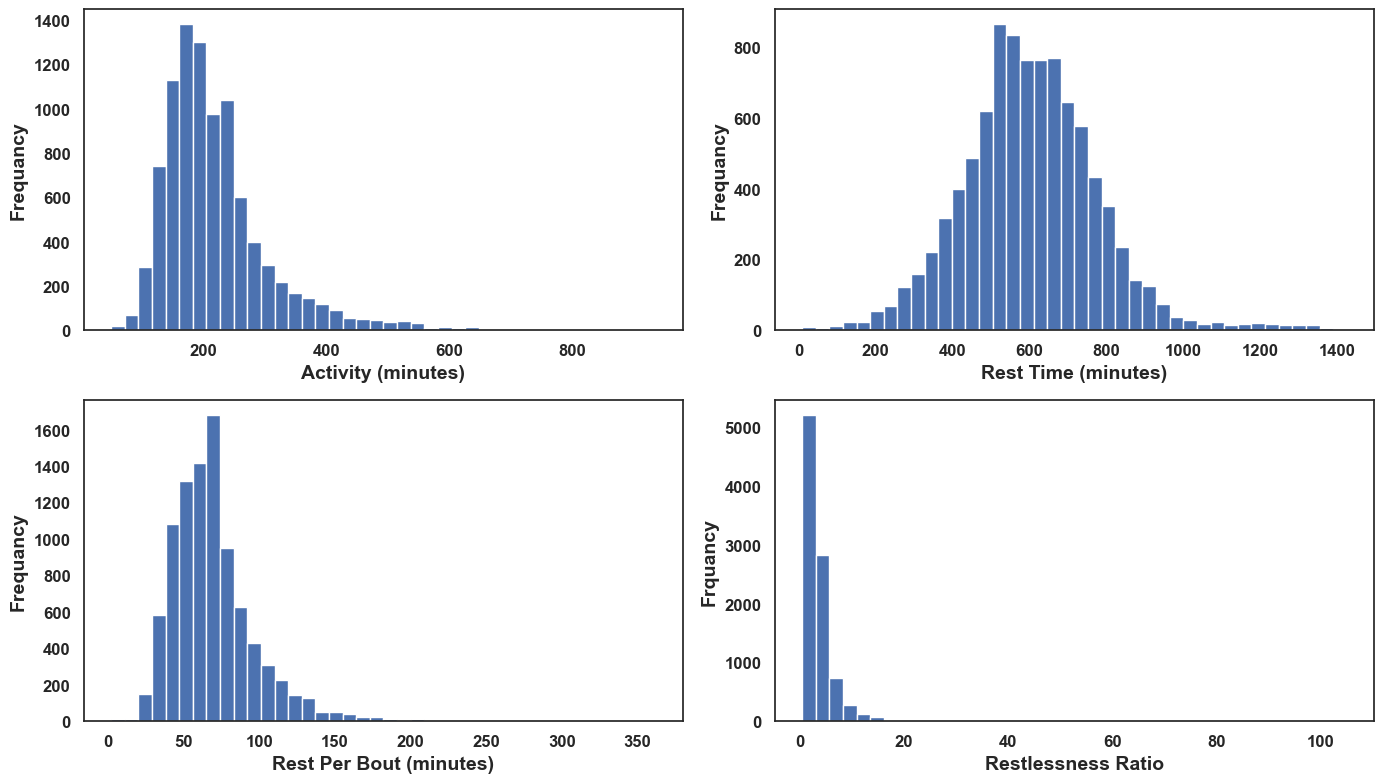

In [63]:
#Setting the backgoud for charts 
sns.set_style('white')
#Setting the figure size
plt.figure(figsize=(14,8))

# Plot 1: Activity
plt.subplot(2,2,1)
plt.hist(df['Activity'], bins=40)
#Setting labels & ticks
plt.xlabel('Activity (minutes)', fontsize=14, fontweight='bold')
plt.ylabel('Frequancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 2: Rest Time
plt.subplot(2,2,2)
plt.hist(df['Rest Time'], bins=40)
#Setting labels & ticks
plt.xlabel('Rest Time (minutes)', fontsize=14, fontweight='bold')
plt.ylabel('Frequancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 3: Rest Per Bout
plt.subplot(2,2,3)
plt.hist(df['Rest Per Bout'], bins=40)
#Setting labels & ticks
plt.xlabel('Rest Per Bout (minutes)', fontsize=14, fontweight='bold')
plt.ylabel('Frequancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 4: Restlessness Ratio
plt.subplot(2,2,4)
plt.hist(df['Restlessness Ratio'], bins=40)
#Setting labels & ticks
plt.xlabel('Restlessness Ratio', fontsize=14, fontweight='bold')
plt.ylabel('Frquancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()

#Show the Chart
#plt.show()
#Save the chart
plt.savefig('distribution_plot_whole_dataset.jpg', dpi=300)

# Distribution plot for single animal

In [64]:
#Filtering the specific animal ID 
animal_id = 3
#Filtering the dataframe for animal id # 3
animal_data = df[df['Cow ID']==animal_id]

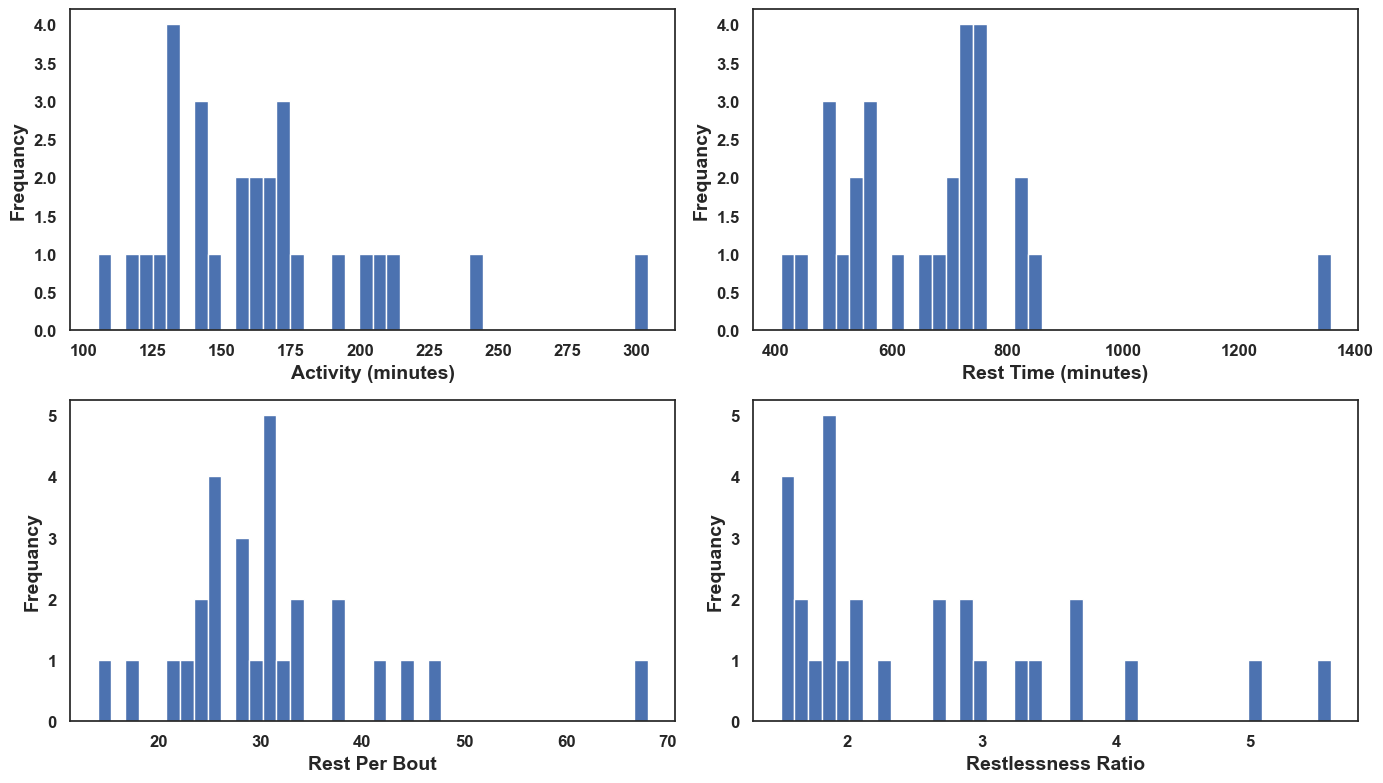

In [65]:
# Setting the background for charts 
sns.set_style('white')
#Setting the figure size for charts 
plt.figure(figsize=(14, 8))

#Plot 1: Activity
plt.subplot(2,2,1)
plt.hist(animal_data['Activity'], bins=40)
#Setting label, & ticks
plt.xlabel('Activity (minutes)', fontsize=14, fontweight='bold')
plt.ylabel('Frequancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 2: Rest Time
plt.subplot(2,2,2)
plt.hist(animal_data['Rest Time'], bins=40)
#Setting label, & ticks
plt.xlabel('Rest Time (minutes)', fontsize=14, fontweight='bold')
plt.ylabel('Frequancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 3: Rest Per Bout
plt.subplot(2,2,3)
plt.hist(animal_data['Rest Per Bout'], bins=40)
#Setting label, & ticks
plt.xlabel('Rest Per Bout', fontsize=14, fontweight='bold')
plt.ylabel('Frequancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#Plot 4: Restlessness Ratio
plt.subplot(2,2,4)
plt.hist(animal_data['Restlessness Ratio'], bins=40)
#Setting label, & ticks
plt.xlabel('Restlessness Ratio', fontsize=14, fontweight='bold')
plt.ylabel('Frequancy', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()

#Save the chart
plt.savefig('distribution_plot_single_animaljpg', dpi=300)

#Show the charts 
plt.show()


# One way ANOVA (Single animal)

## Libraries

In [68]:
#Importing libraries
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## Filtering data for single animal

In [69]:
#Filtering single animal ID 
animal_id = 3
#Filtering single animal id from dataset
animal_data = df[df['Cow ID'] == animal_id]

## Encoding categorical variables

In [70]:
#Encoding the categorical variables 
label_encoder = LabelEncoder()
animal_data_encoded = animal_data.copy()
animal_data_encoded['Manner Of Calving'] = label_encoder.fit_transform(animal_data['Manner Of Calving'])
animal_data_encoded['Parity'] = label_encoder.fit_transform(animal_data['Parity'])

## Creating One Way ANOVA

In [71]:
#Creating One way ANOVA for variables
results_activity_parity = stats.f_oneway(animal_data_encoded['Activity'], animal_data_encoded['Parity'])
results_activity_manner_of_calving = stats.f_oneway(animal_data_encoded['Activity'], animal_data_encoded['Manner Of Calving'])

results_rest_time_parity = stats.f_oneway(animal_data_encoded['Rest Time'], animal_data_encoded['Parity'])
results_rest_time_manner_of_calving = stats.f_oneway(animal_data_encoded['Rest Time'], animal_data_encoded['Manner Of Calving'])

results_rest_per_bout_parity = stats.f_oneway(animal_data_encoded['Rest Per Bout'], animal_data_encoded['Parity'])
results_rest_per_bout_manner_of_calving = stats.f_oneway(animal_data_encoded['Rest Per Bout'], animal_data_encoded['Manner Of Calving'])
results_restlessness_ratio_parity = stats.f_oneway(animal_data_encoded['Restlessness Ratio'], animal_data_encoded['Parity'])
results_restlessness_ratio_manner_of_calving = stats.f_oneway(animal_data_encoded['Restlessness Ratio'], animal_data_encoded['Manner Of Calving'])

## Printing Result

In [72]:
#Printing the results
print('ANOVA for Animal ID 3:')
print('Activity Multiparous: F-statistics:',  results_activity_parity.statistic)
print('Activity Multiaprous: p-value:', results_activity_parity.pvalue)
print('Activity Manner of Calving: F-statistics:', results_activity_manner_of_calving.statistic)
print('Activity Manner of Calving: p.value', results_activity_manner_of_calving.pvalue)

print('Rest Time Multiparous: F-statistics:', results_rest_time_parity.statistic)
print('Rest Time Multiparous: p-value:', results_rest_time_parity.pvalue)
print('Rest Time Manner of Calving: F-statistics:', results_rest_time_manner_of_calving.statistic)
print('Rest Time Manner of Calving: p-value:', results_rest_time_manner_of_calving.pvalue)

print('Rest Per Bout Multiparous - F-statistics:', results_rest_per_bout_parity.statistic)
print('Rest Per Bout Multiparous: p-value:', results_rest_per_bout_parity.pvalue)
print('Rest Per Bout Manner of Calving: F-statistics', results_rest_per_bout_manner_of_calving.statistic)
print('Rest Per Bout Manner of Calving:  p-value:', results_rest_per_bout_manner_of_calving.pvalue)

print('Restlessness Ratio Multiparous: F-statistics:', results_restlessness_ratio_parity.statistic)
print('Restlessness Ratio Multiparous: p-value', results_restlessness_ratio_parity.pvalue)
print('Restlessness Ratio Manner of Calving: F-statistics:', results_restlessness_ratio_manner_of_calving.statistic)
print('Restlessness Ratio Manner of Calving: p-value', results_restlessness_ratio_manner_of_calving.pvalue)

ANOVA for Animal ID 3:
Activity Multiparous: F-statistics: 438.35200368098907
Activity Multiaprous: p-value: 1.3841909692836581e-27
Activity Manner of Calving: F-statistics: 438.35200368098907
Activity Manner of Calving: p.value 1.3841909692836581e-27
Rest Time Multiparous: F-statistics: 377.00393589084626
Rest Time Multiparous: p-value: 5.0738123286684154e-26
Rest Time Manner of Calving: F-statistics: 377.00393589084626
Rest Time Manner of Calving: p-value: 5.0738123286684154e-26
Rest Per Bout Multiparous - F-statistics: 249.95798503911087
Rest Per Bout Multiparous: p-value: 6.504459744313711e-22
Rest Per Bout Manner of Calving: F-statistics 249.95798503911087
Rest Per Bout Manner of Calving:  p-value: 6.504459744313711e-22
Restlessness Ratio Multiparous: F-statistics: 160.0485330907435
Restlessness Ratio Multiparous: p-value 8.81218756418833e-18
Restlessness Ratio Manner of Calving: F-statistics: 160.0485330907435
Restlessness Ratio Manner of Calving: p-value 8.81218756418833e-18


## Summary Statistics of numerical variables

## Library

In [73]:
#Importing library
import scipy.stats as stats

## Grouping the catgeorical variables for summary statistics

In [74]:
#Grouping data with categorical variables and calculating the summary statistics 
summary_stats = df.groupby(['Manner Of Calving', 'Parity']).agg({
    'Activity': [np.mean, np.std, stats.sem],
    'Rest Time': [np.mean, np.std, stats.sem],
    'Rest Per Bout': [np.mean, np.std, stats.sem],
    'Restlessness Ratio': [np.mean, np.std, stats.sem]
})

In [75]:
#Creating a dictionary to store summary statistics
summary_dict = {}

for (manner, parity), values in summary_stats.iterrows():
    if manner not in summary_dict:
        summary_dict[manner] = {}
    summary_dict[manner][parity] = {
        'Activity': {
            'Mean': values['Activity']['mean'],
            'Std': values['Activity']['std'],
            'Std Err': values['Activity']['sem']
        },
        'Rest Time': {
            'Mean': values['Rest Time']['mean'],
            'Std': values['Rest Time']['std'],
            'Std Err': values['Rest Time']['sem']
        },
        'Rest Per Bout': {
            'Mean': values['Rest Per Bout']['mean'],
            'Std': values['Rest Per Bout']['std'],
            'Std Err': values['Rest Per Bout']['sem']
        },
        'Restlessness Ratio': {
            'Mean': values['Restlessness Ratio']['mean'],
            'Std': values['Restlessness Ratio']['std'],
            'Std Err': values['Restlessness Ratio']['sem']
        }
    }

In [76]:
#Printing the summary statistics 
for manner, data in summary_dict.items():
    print(f"Manner of Calving: {manner}")
    for parity, stats in data.items():
        print(f"  Parity: {parity}")
        for variable, values in stats.items():
            print(f"    {variable}:")
            print(f"      Mean: {values['Mean']}")
            print(f"      Standard Deviation: {values['Std']}")
            print(f"      Standard Error: {values['Std Err']}")

Manner of Calving: Difficult
  Parity: multiparous
    Activity:
      Mean: 164.1627906976744
      Standard Deviation: 41.804494080898905
      Standard Error: 6.375125580814917
    Rest Time:
      Mean: 723.5813953488372
      Standard Deviation: 106.63672925675317
      Standard Error: 16.261948756599892
    Rest Per Bout:
      Mean: 58.372093023255815
      Standard Deviation: 16.784379438454007
      Standard Error: 2.5595938682842028
    Restlessness Ratio:
      Mean: 1.974418604651163
      Standard Deviation: 0.7017301825982941
      Standard Error: 0.10701284960547745
  Parity: primiparous
    Activity:
      Mean: 213.10169491525423
      Standard Deviation: 71.7230533119448
      Standard Error: 9.337546202901668
    Rest Time:
      Mean: 504.864406779661
      Standard Deviation: 160.74486720256294
      Standard Error: 20.927199206858827
    Rest Per Bout:
      Mean: 60.30508474576271
      Standard Deviation: 22.100284158953418
      Standard Error: 2.87721192702089

# Calculating Correlation between numerical variables

## Filteration of numerical features

In [78]:
#Filtering numerical variables
variables_of_interest = ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Days']

#Subsetting the dataframe
subset_df = df[variables_of_interest]

## Correlation matrix

In [79]:
#Calculating the correation matrix 
corr_matrix = subset_df.corr()

## Visualization of correlation matrix

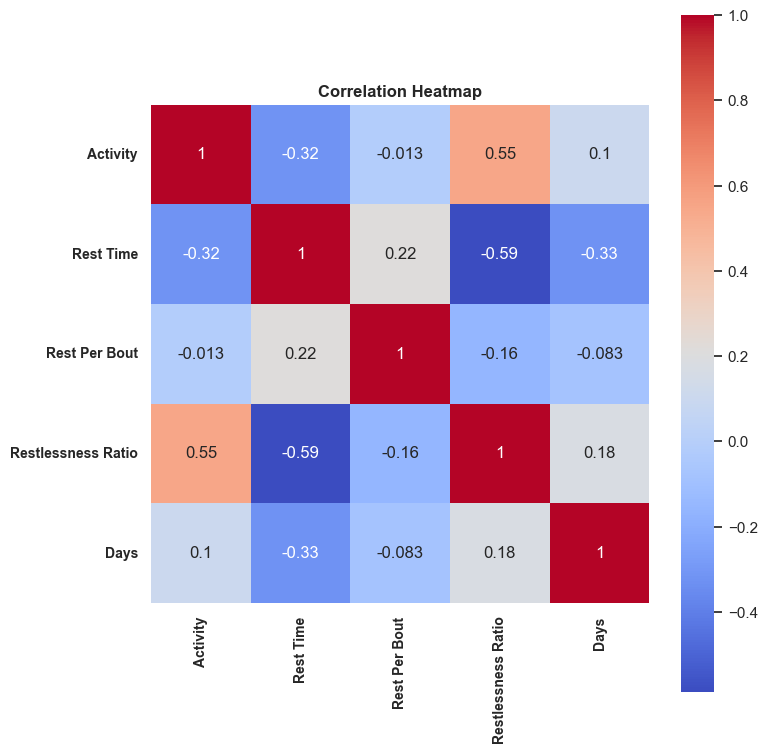

In [80]:
#Setting the background for chart
sns.set_style('white')
#Setting the figure size
plt.figure(figsize=(8,8))
#Creating correlation plot through heatmap
sns.heatmap(corr_matrix, annot=True, square=True, cbar=True, cmap='coolwarm')
#Setting title, & ticks
plt.title('Correlation Heatmap', fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.tight_layout()
#Show the chart
plt.show()

# Correlation matrix for single animal

## Data Filteration for single animal

In [81]:
#Filtering single animal ID 
animal_id = 3

#Filtering the data for single animal ID 
animal_data = df[df['Cow ID']==animal_id]

## Selection of numerical variables

In [82]:
#Creating variabales of interest 
variables_of_interest = ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']

#Creating a subset dataframe for single animal 
subset_df = animal_data[variables_of_interest]

## Correlation matrix for single animal

In [83]:
#Calculating the correlation matrix 
corr_matrix = subset_df.corr()

## Visualization of developed matrix for single animal

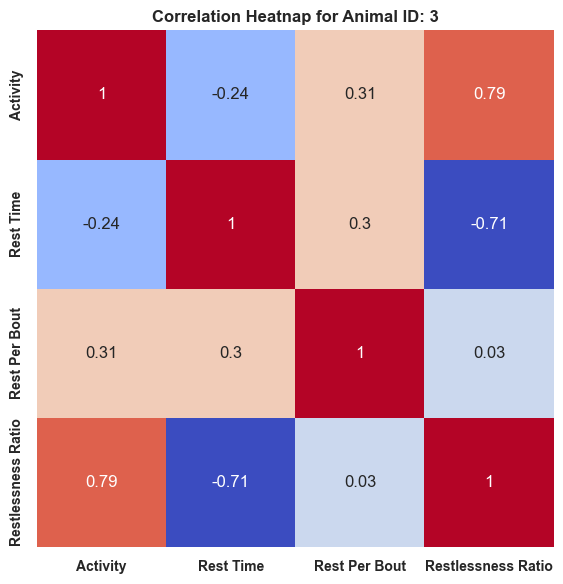

In [84]:
#Setting the background for chart 
sns.set_style('white')
#Setting the figure size
plt.figure(figsize=(8,6))
#Creating correaltion chart through heatmap for single animal 
sns.heatmap(corr_matrix, annot=True, square=True, cbar=False, cmap='coolwarm')
#Setting title, & ticks 
plt.title(f'Correlation Heatnap for Animal ID: {animal_id}', fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
#Show tge chart
plt.show()

# Calculation of 25th, 50th, & 75th percentiles (Single Animal)

## Selection of single animal ID

In [86]:
#Selecting animal id 
animal_id = 3
#Filtering dataframe for selecetd animal 
animal_data = df[df['Cow ID']==animal_id]

## Selection of numerical variables

In [87]:
#Filterig variable of inerests 
variables_of_interest = ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']

## Calculation of percentiles

In [88]:
#Calculating the percentiles for selecetd animal 
percentiles_dict = {}

for variable in variables_of_interest:
    percentiles_dict[variable] = {
        '25th Percentile': np.percentile(animal_data[variable], 25),
        '50th Percentile': np.percentile(animal_data[variable], 50),
        '75th Percentile': np.percentile(animal_data[variable], 75)
    }

In [89]:
#Printing the results 
print(f'Percentiles for Animal ID: {animal_id}')
for variable, percentiles in percentiles_dict.items():
    print(f'{variable}:')
    print(f"  25th Percentile: {percentiles['25th Percentile']}")
    print(f"  50th Percentile: {percentiles['50th Percentile']}")
    print(f"  75th Percentile: {percentiles['75th Percentile']}")

Percentiles for Animal ID: 3
Activity:
  25th Percentile: 134.0
  50th Percentile: 160.0
  75th Percentile: 174.25
Rest Time:
  25th Percentile: 542.25
  50th Percentile: 689.5
  75th Percentile: 744.25
Rest Per Bout:
  25th Percentile: 25.0
  50th Percentile: 30.0
  75th Percentile: 33.25
Restlessness Ratio:
  25th Percentile: 1.875
  50th Percentile: 2.1
  75th Percentile: 3.075


# Calculation of 25th, 50th, & 75th percentiles (Whole dataset

## Filtering the numerical variables

In [90]:
#Filterig variable of inerests 
variables_of_interest = ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']

## Calculation of percentiles

In [91]:
#Calculating the percentiles for wholw dataset 
percentiles_dict = {}

for variable in variables_of_interest:
    percentiles_dict[variable] = {
        '25th Percentile': np.percentile(df[variable], 25),
        '50th Percentile': np.percentile(df[variable], 50),
        '75th Percentile': np.percentile(df[variable], 75)
    }
    
#Printing the results 
print('Percentiles for Whole Dataset:')
for variable, percentiles in percentiles_dict.items():
    print(f'{variable}:')
    print(f"  25th Percentile: {percentiles['25th Percentile']}")
    print(f"  50th Percentile: {percentiles['50th Percentile']}")
    print(f"  75th Percentile: {percentiles['75th Percentile']}")

Percentiles for Whole Dataset:
Activity:
  25th Percentile: 162.0
  50th Percentile: 200.0
  75th Percentile: 251.0
Rest Time:
  25th Percentile: 493.0
  50th Percentile: 597.0
  75th Percentile: 708.0
Rest Per Bout:
  25th Percentile: 50.0
  50th Percentile: 65.0
  75th Percentile: 80.0
Restlessness Ratio:
  25th Percentile: 2.0
  50th Percentile: 2.8
  75th Percentile: 4.3


# Calculation of Skewness and Kurtosis (Whole dataset)

## Library

In [92]:
#Importing library
from scipy.stats import skew, kurtosis

## Filtering numerical variables

In [93]:
#Calculating skewness & kurtosis 
dataset_skewness = df[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']].apply(skew)
dataset_kurtosis = df[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']].apply(kurtosis)

## Printing Results

In [94]:
#Printing skewness & kurtosis
print('Skewness for Whole Dataset:')
print(dataset_skewness)
print('\nKurtosis for Whole Dataset:')
print(dataset_kurtosis)

Skewness for Whole Dataset:
Activity               1.933719
Rest Time              0.475220
Rest Per Bout          2.090766
Restlessness Ratio    10.247276
dtype: float64

Kurtosis for Whole Dataset:
Activity                5.990773
Rest Time               1.612854
Rest Per Bout           9.924048
Restlessness Ratio    202.544495
dtype: float64


# Calculation of Skewness & Kurtosis (Single Animal)

## Selection of single animal

In [95]:
#Selecting single animal 
animal_id = 3

#Filtering dataset for single animal
animal_data = df[df['Cow ID'] == animal_id]

## Calculation of skewness & kurtosis¶

In [96]:
#Calculating skewness & kurtosis 
animal_data_skewness = animal_data[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']].apply(skew)
animal_data_kurtosis = animal_data[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']].apply(kurtosis)

## Printing Result

In [97]:
#Printing skewness & kurtosis
print(f' Skewness for Animal ID: {animal_id}:')
print(animal_data_skewness)
print(f'\nKurtosis for Animal ID: {animal_id}:')
print(animal_data_kurtosis)

 Skewness for Animal ID: 3:
Activity              1.472881
Rest Time             1.772987
Rest Per Bout         1.621785
Restlessness Ratio    1.213153
dtype: float64

Kurtosis for Animal ID: 3:
Activity              2.792289
Rest Time             5.279918
Rest Per Bout         3.903156
Restlessness Ratio    0.839853
dtype: float64


# Tukey's Honsetly Significant Difference (HSD) Test

## Libraries

In [101]:
#Importing libraries
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from openpyxl import Workbook

## Creating a copy data frame to store variable

In [102]:
#Creating a copy data frame to store variable
df_encoded = df.copy()

## Encoding categorical variable

In [103]:
#Encoding Categorical variable
label_encoder = LabelEncoder()
df_encoded['Parity'] = label_encoder.fit_transform(df['Parity'])

## Speration of Parity variable

In [104]:
#Separating data for primiparous and multiparous
primiparous_data = df_encoded[df_encoded['Parity'] == 0]
multiparous_data = df_encoded[df_encoded['Parity'] == 1]

## Seclecting numerical variables

In [105]:
#Selection of variables to perform ANOVA
variables_to_test = ['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio']

## ANOVA for variables

In [107]:
#Performing and printing ANOVA result
print('ANOVA for Whole Dataset:')
for variable in variables_to_test:
    results_primiparous = stats.f_oneway(primiparous_data[variable], primiparous_data['Parity'])
    results_multiparous = stats.f_oneway(multiparous_data[variable], multiparous_data['Parity'])
    
    print(f'{variable.capitalize()} Primiparous: F-Statistics = {results_primiparous.statistic:.4f}, p-value = {results_primiparous.pvalue:.15f}')
    print(f'{variable.capitalize()} Multiparous: F-Statistics = {results_multiparous.statistic:.4f}, p-value = {results_multiparous.pvalue:.15f}')

ANOVA for Whole Dataset:
Activity Primiparous: F-Statistics = 16175.4164, p-value = 0.000000000000000
Activity Multiparous: F-Statistics = 39368.4672, p-value = 0.000000000000000
Rest time Primiparous: F-Statistics = 48071.2186, p-value = 0.000000000000000
Rest time Multiparous: F-Statistics = 70087.3676, p-value = 0.000000000000000
Rest per bout Primiparous: F-Statistics = 16691.5517, p-value = 0.000000000000000
Rest per bout Multiparous: F-Statistics = 35599.4086, p-value = 0.000000000000000
Restlessness ratio Primiparous: F-Statistics = 4846.5665, p-value = 0.000000000000000
Restlessness ratio Multiparous: F-Statistics = 3588.0897, p-value = 0.000000000000000


## Tukey's HSD Test (pairwise comparison)

In [108]:
#Tukey's HSD test for pairwise comparisons
tukey_results = {}
for variable in variables_to_test:
    tukey_result = pairwise_tukeyhsd(df_encoded[variable], df_encoded['Parity'])
    tukey_results[variable] = tukey_result

## Printing Result

In [109]:
#Printing Tukey's HSD result
print('\nTukey\'s HSD Results:')
for variable, tukey_result in tukey_results.items():
    print(f'{variable.capitalize()} - Tukey\'s HSD:')
    print(tukey_result)
    print()


Tukey's HSD Results:
Activity - Tukey's HSD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1  21.1804   0.0 17.2568 25.104   True
--------------------------------------------------

Rest time - Tukey's HSD:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper   reject
-------------------------------------------------------
     0      1 -104.9956   0.0 -112.4003 -97.5909   True
-------------------------------------------------------

Rest per bout - Tukey's HSD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     0      1 -10.8995   0.0 -12.16 -9.6389   True
--------------------------------------------------

Restlessness ratio - Tukey's HSD:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meand

## Saving the results to Microsoft Excel

In [110]:
#Saving results to microsoft excel workbook
wb = Workbook()
anova_sheet = wb.active
anova_sheet.title = 'ANOVA Results'

## Adding sheets for Tukey's HSD result

In [111]:
#Adding separate sheets for each variable 
for variable, tukey_result in tukey_results.items():
    sheet = wb.create_sheet(title=f'Tukey_{variable}')
    tukey_df = tukey_result.summary().as_csv()
    lines = tukey_df.split('\n')
    for line in lines:
        sheet.append(line.split(','))

## Saving Excel workbook

In [112]:
#Saving the Excel workbook
excel_file = 'anova_and_tukey_results.xlsx'
wb.save(excel_file)

#Printing a message indicating the results have been saved
print(f'Results saved to {excel_file}.')

Results saved to anova_and_tukey_results.xlsx.


In [113]:
# Filter data for primiparous and multiparous animals
lact_no_1_data = df[df['Lactation No'] == 1]
lact_no_2_data = df[df['Lactation No'] == 2]
lact_no_3_data = df[df['Lactation No'] >= 3]
# Calculate statistics for animals
lact_no_1_activity_mean = lact_no_1_data['Activity'].mean()
lact_no_2_activity_mean = lact_no_2_data['Activity'].mean()
lact_no_3_activity_mean = lact_no_3_data['Activity'].mean()
lact_no_1_activity_std = lact_no_1_data['Activity'].std()
lact_no_2_activity_std = lact_no_2_data['Activity'].std()
lact_no_3_activity_std = lact_no_3_data['Activity'].std()
lact_no_1_rest_time_mean = lact_no_1_data['Rest Time'].mean()
lact_no_2_rest_time_mean = lact_no_2_data['Rest Time'].mean()
lact_no_3_rest_time_mean = lact_no_3_data['Rest Time'].mean()
lact_no_1_rest_time_std = lact_no_1_data['Rest Time'].std()
lact_no_2_rest_time_std = lact_no_2_data['Rest Time'].std()
lact_no_3_rest_time_std = lact_no_3_data['Rest Time'].std()
lact_no_1_rest_per_bout_mean = lact_no_1_data['Rest Per Bout'].mean()
lact_no_2_rest_per_bout_mean = lact_no_2_data['Rest Per Bout'].mean()
lact_no_3_rest_per_bout_mean = lact_no_3_data['Rest Per Bout'].mean()
lact_no_1_rest_per_bout_std = lact_no_1_data['Rest Per Bout'].std()
lact_no_2_rest_per_bout_std = lact_no_2_data['Rest Per Bout'].std()
lact_no_3_rest_per_bout_std = lact_no_3_data['Rest Per Bout'].std()
lact_no_1_restlessness_ratio_mean = lact_no_1_data['Restlessness Ratio'].mean()
lact_no_2_restlessness_ratio_mean = lact_no_2_data['Restlessness Ratio'].mean()
lact_no_3_restlessness_ratio_mean = lact_no_3_data['Restlessness Ratio'].mean()
lact_no_1_restlessness_ratio_std = lact_no_1_data['Restlessness Ratio'].std()
lact_no_2_restlessness_ratio_std = lact_no_2_data['Restlessness Ratio'].std()
lact_no_3_restlessness_ratio_std = lact_no_3_data['Restlessness Ratio'].std()
# Compare means using t-tests
from scipy import stats
t_test_activity = stats.ttest_ind(lact_no_1_data['Activity'], lact_no_2_data['Activity'])
t_test_rest_time = stats.ttest_ind(lact_no_1_data['Rest Time'], lact_no_2_data['Rest Time'])
t_test_rest_per_bout = stats.ttest_ind(lact_no_1_data['Rest Per Bout'], lact_no_2_data['Rest Per Bout'])
t_test_restlessness_ratio = stats.ttest_ind(lact_no_1_data['Restlessness Ratio'], lact_no_2_data['Restlessness Ratio'])

In [114]:
# Print results
print("Activity:")
print("Lactation No 1:", lact_no_1_activity_mean, lact_no_1_activity_std)
print("Lactation No 2:", lact_no_2_activity_mean, lact_no_2_activity_std)
print("Lactation No 3:", lact_no_3_activity_mean, lact_no_3_activity_std)
print("t-test p-value:", t_test_activity.pvalue)
print("\nRest Time:")
print("Lactation No 1:", lact_no_1_rest_time_mean, lact_no_1_rest_time_std)
print("Lactation No 2:", lact_no_2_rest_time_mean, lact_no_2_rest_time_std)
print("Lactation No 3:", lact_no_3_rest_time_mean, lact_no_3_rest_time_std)
print("t-test p-value:", t_test_rest_time.pvalue)
print("\nRest Per Bout:")
print("Lactation No 1:", lact_no_1_rest_per_bout_mean, lact_no_1_rest_per_bout_std)
print("Lactation No 2:", lact_no_2_rest_per_bout_mean, lact_no_2_rest_per_bout_std)
print("Lactation No 3:", lact_no_3_rest_per_bout_mean, lact_no_3_rest_per_bout_std)
print("t-test p-value:", t_test_rest_per_bout.pvalue)
print("\nRestlessness Ratio:")
print("Lactation No 1:", lact_no_1_restlessness_ratio_mean, lact_no_1_restlessness_ratio_std)
print("Lactation No 2:", lact_no_2_restlessness_ratio_mean, lact_no_2_restlessness_ratio_std)
print("Lactation No 3:", lact_no_3_restlessness_ratio_mean, lact_no_3_restlessness_ratio_std)
print("t-test p-value:", t_test_restlessness_ratio.pvalue)


Activity:
Lactation No 1: 226.90758555432896 90.35673066703525
Lactation No 2: 208.1201529219006 92.89402142543202
Lactation No 3: 205.36998254799303 84.31305320625268
t-test p-value: 7.656352356365705e-15

Rest Time:
Lactation No 1: 570.3813278662672 171.56269510476886
Lactation No 2: 676.0802839978154 171.19214462573524
Lactation No 3: 666.7085514834206 162.18663209360085
t-test p-value: 1.1026861690037671e-115

Rest Per Bout:
Lactation No 1: 65.61378331493455 27.269675428997726
Lactation No 2: 73.13926815947569 27.742920985709276
Lactation No 3: 81.19371727748691 37.89796684023997
t-test p-value: 5.305645215394092e-25

Restlessness Ratio:
Lactation No 1: 4.087919886453241 4.118747525301474
Lactation No 2: 2.8476788640087385 2.1799016916686655
Lactation No 3: 2.863001745200698 2.3666037563848628
t-test p-value: 5.858958060920078e-35
